# Loading data

In [1]:
import pandas as pd

TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

# Load train data
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

# Load test data
df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = -1
df_i_test["dataset"] = "test"

# Load metadata embedded in mp3 into dataframe
df = pd.concat([df_i_train, df_i_test])
df_track_info = pd.read_csv("csv/metadata_embedded_in_mp3.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')

# Load audio features into dataframe
df_audio_features = pd.read_csv("csv/audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")
df.columns
df.head(10)

,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,Unnamed: 0_x,...,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7,train,5321,...,440.000000,0.601478,D,major,G,major,G,major,G,major
1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3,train,8946,...,434.193115,0.944516,C,minor,C,minor,C,minor,C,minor
2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6,train,8159,...,434.193115,0.957651,Bb,major,D,minor,D,minor,D,minor
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2,train,3874,...,441.272583,0.796499,G,minor,G,minor,G,minor,G,minor
4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7,train,5631,...,434.946167,0.860068,A,minor,D,minor,D,minor,D,minor
5,1073929880,Đàn Bà,Don Hồ,6515,Song Ngọc,100288,2017-10-01 21:33:00,3,train,7447,...,436.960693,0.768609,A,minor,D,minor,A,minor,A,minor
6,1073949310,Yêu Một Người Sống Bên Một Người,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,4,train,3052,...,442.548920,0.701749,D,minor,A,minor,A,minor,A,minor
7,1073994297,Mất Nhau Trong Đời,Minh Tuyết,455,Huỳnh Nhật Tân,100306,2017-11-01 18:27:00,8,train,6303,...,434.193115,0.913990,C,minor,C,minor,C,minor,C,minor
8,1073994298,Những Ân Tình Xưa,"Minh Tuyết, Bằng Kiều",455.306,Hoài An,100133,2017-11-01 18:27:00,4,train,593,...,437.971466,0.726335,A,minor,A,minor,A,minor,A,minor
9,1073994300,Ở Nơi Đó Em Cười,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,8,train,8982,...,437.718536,0.732484,A,minor,D,minor,D,minor,A,minor


# Feature generation

## Album-related features

For album-related features there are some features we can think about:
- len of album 
- Does album contains some specific words such as : "Remix", "OST", "Cover", etc. The reason I think about that idea is when I look at the data, I notice that the song contains word like "OST" are likely to have better rank. Why? "OST" stands for "Original Sound Track", may be the original songs are likely more popular.
- Is the title name of the song same as name of album.  Why I think about that? I guess people tend to name for the album name by the title of the most hot song on this album.


In [2]:
# Fill nan album
print("There is {} ratio is nan album".format(len(df[df["album"].isnull()])/len(df)))
df["album"]  = df["album"].fillna("")
# Features
df["len_album_name"] = df["album"].apply(lambda x: len(x.split(" ")))
df["isRemixAlbum"] = [ 1 if "Remix" in t else 0 for t in df["album"]]
df["isOSTAlbum"] = [ 1 if "OST" in t else 0 for t in df["album"]]
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]
df["isBeatAlbum"] = [ 1 if "Beat" in t else 0 for t in df["album"]]
df["isTopHitAlbum"] = [ 1 if "Top Hits" in t else 0 for t in df["album"]]
df["isCoverAlbum"] = [ 1 if "Cover" in t else 0 for t in df["album"]]
df["isEPAlbum"] = [ 1 if "EP" in t else 0 for t in df["album"]]
df["album_name_is_title_name"]= [1 if r.title in r.album  else 0 for i,r in df.iterrows() ]
# To catecorical
df["album"] = df["album"].astype('category')
df["album"] =  df["album"].cat.codes

There is 0.24038838760298156 ratio is nan album


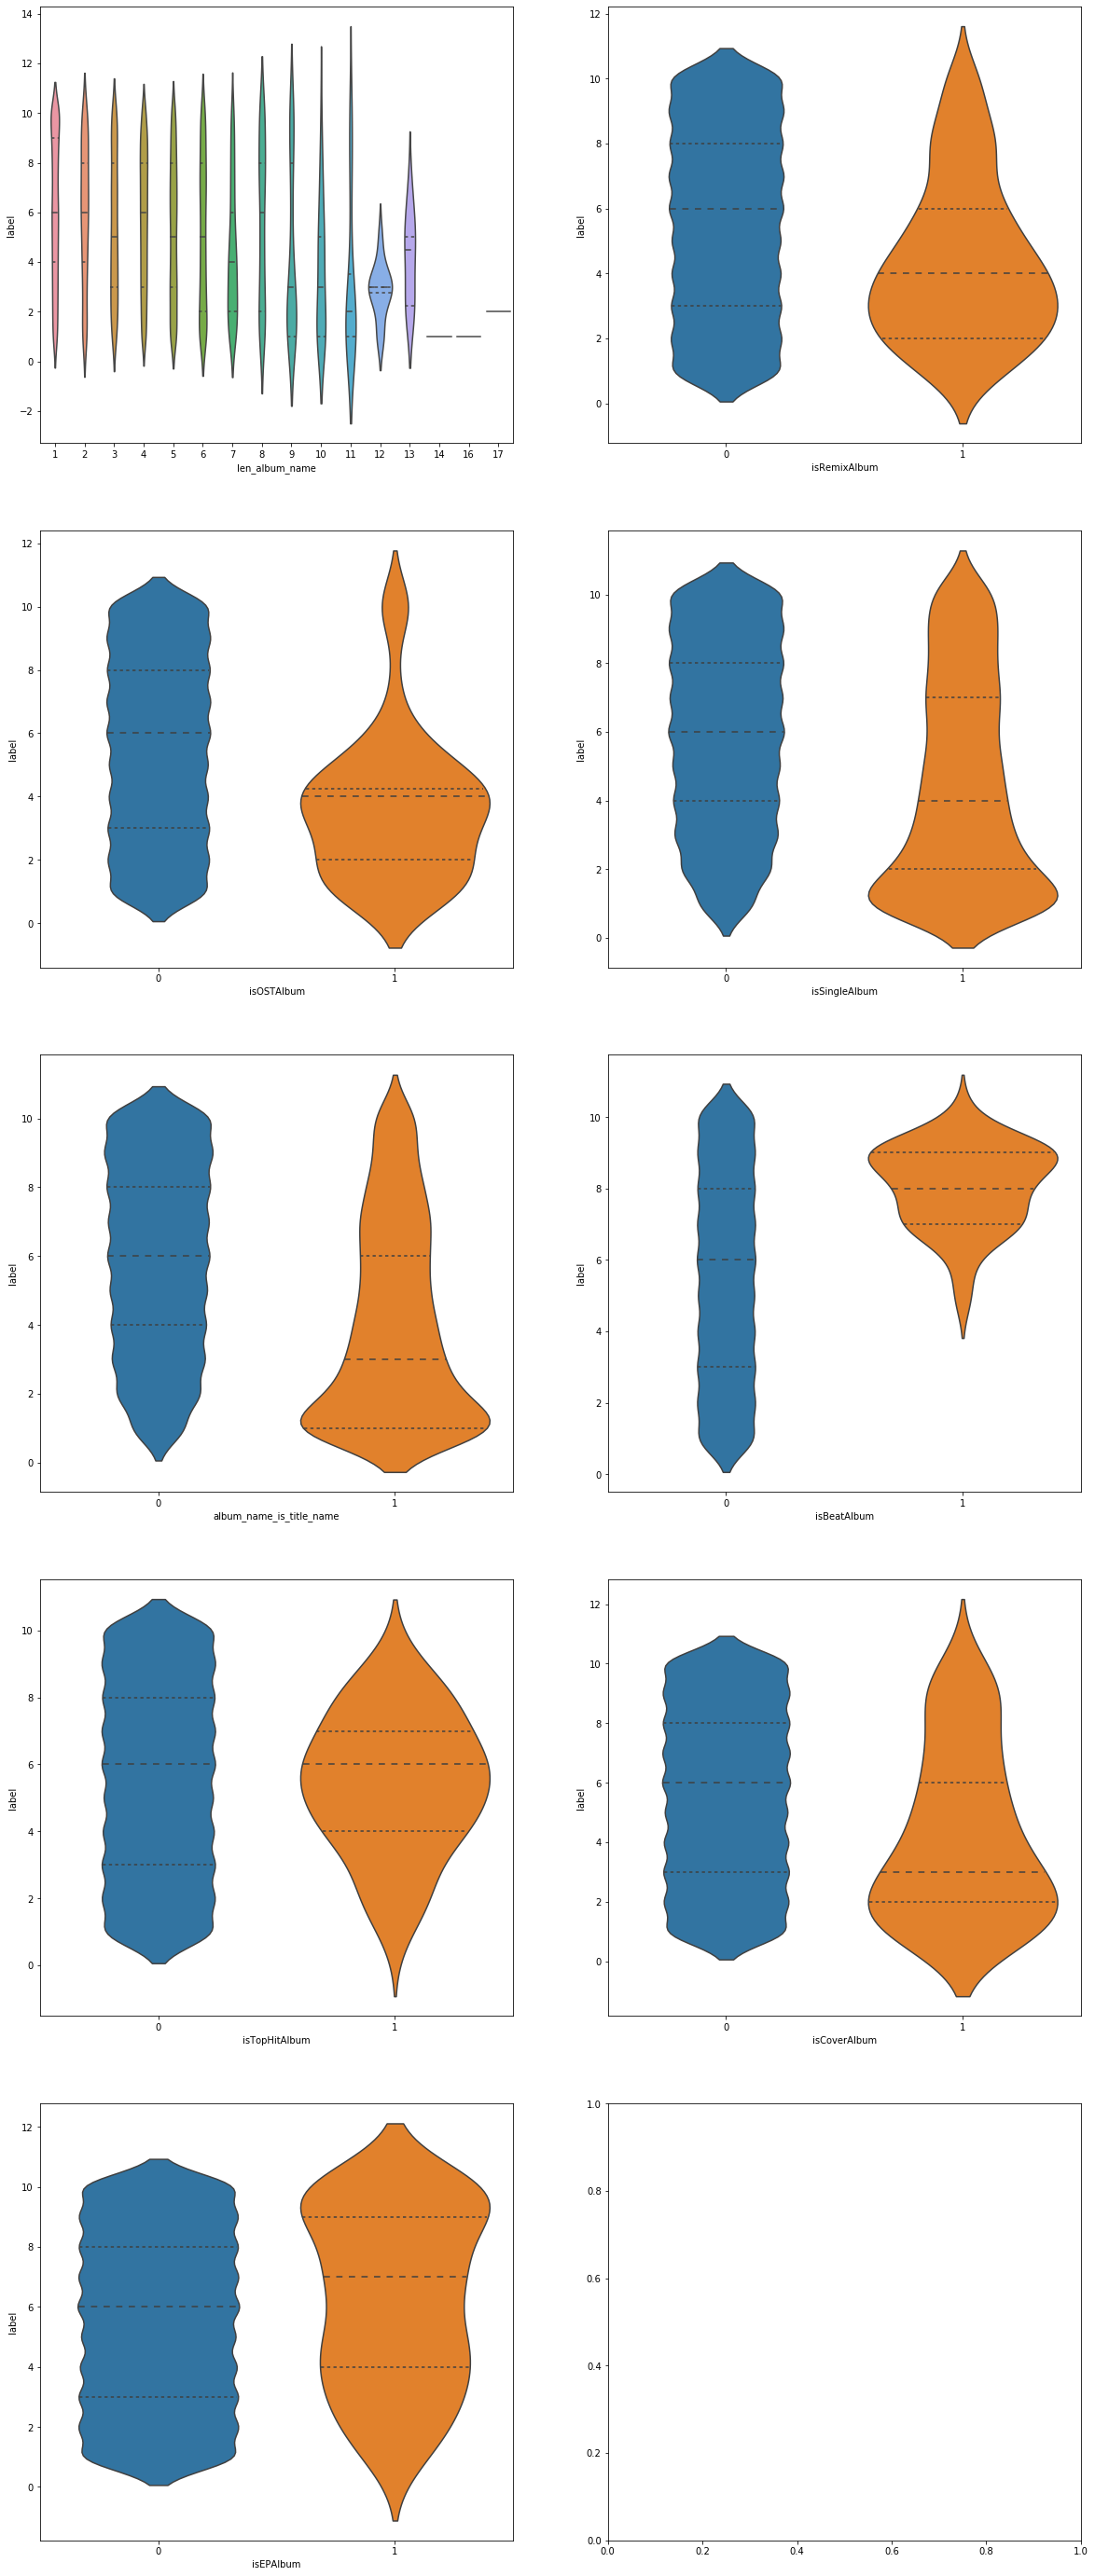

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

title_features = ["len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", 
                  "album_name_is_title_name", "isBeatAlbum", "isTopHitAlbum", "isCoverAlbum", "isEPAlbum"]
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)


**Note**: Based on those graphs, we can see that those features kind of helpful. For example, the songs having "Remix" in the title tend to have better ranks than the one dont have

## Genre feature

There is 0.0 ratio is nan genre


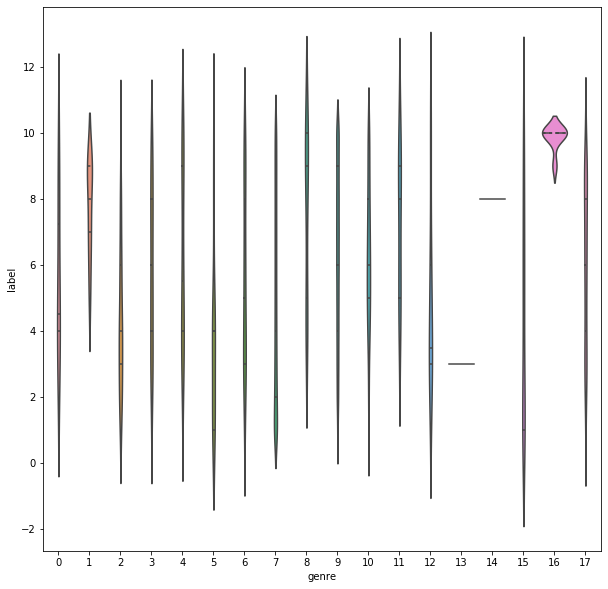

In [6]:
# Fill genre
fig= plt.figure(figsize=(10,10))
print("There is {} ratio is nan genre".format(len(df[df["genre"].isnull()])/len(df)))
df["genre"]  = df["genre"].fillna("No genre")
df["genre"] = df["genre"].astype('category')
df["genre"] =  df["genre"].cat.codes

sns.violinplot(x="genre", y="label", data=df[df.dataset=="train"], inner="quartile")


## Lyric

There is 0.6722244017261672 ratio is nan lyric


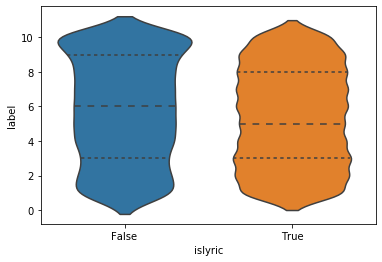

In [8]:
# Fill lyric
print("There is {} ratio is nan lyric".format(len(df[df["lyric"].isnull()])/len(df)))
df["lyric"]  = df["lyric"].fillna("")
df["islyric"] = df["lyric"].apply(lambda x: not len(x))

sns.violinplot(x="islyric", y="label", data=df[df.dataset=="train"], inner="quartile")

In [ ]:
# Audio lower features
# low_level_features =  [f for f in df.columns.values if "lowlevel" in f]
# df[low_level_features] = df[low_level_features].fillna(df[low_level_features].mean())

# title_features = low_level_features
# for feature in title_features:
#     sns.jointplot(x=feature, y="label", data=df[df.dataset=="train"],kind="kde", space=0, color="g")    

## Rhythm features

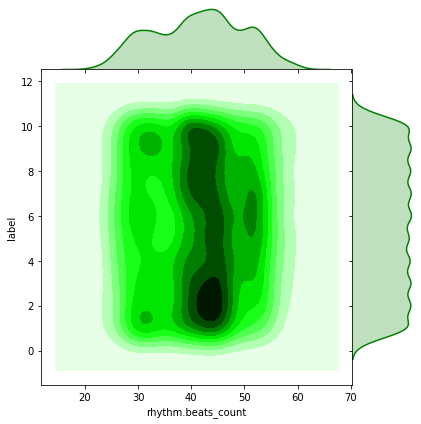

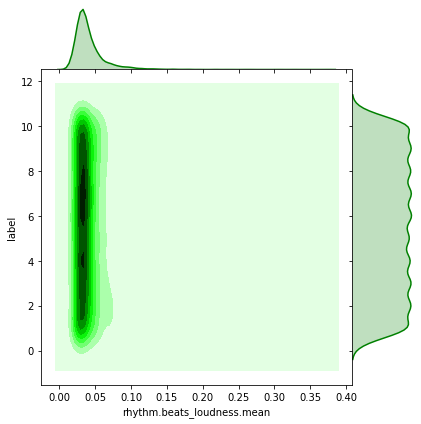

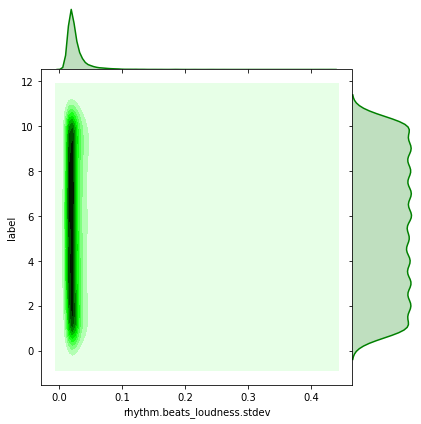

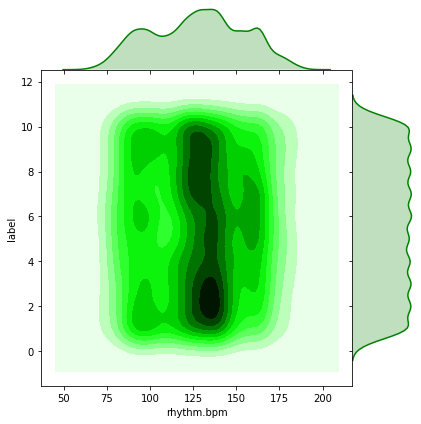

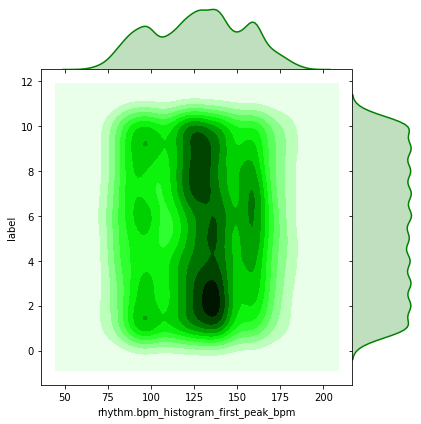

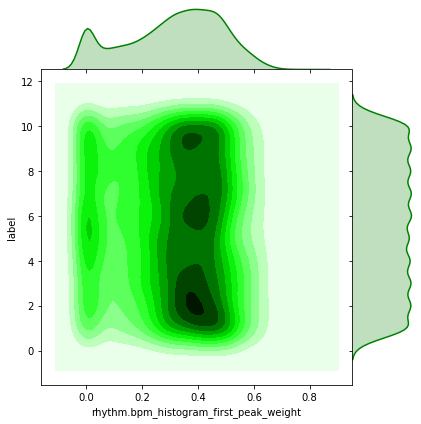

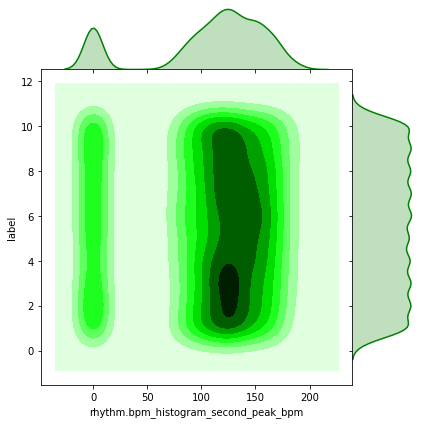

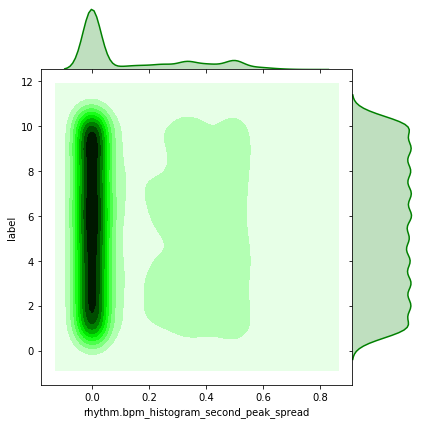

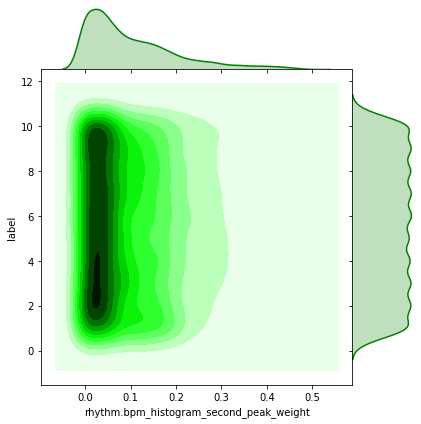

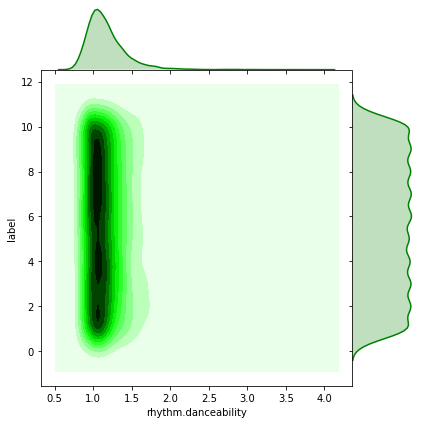

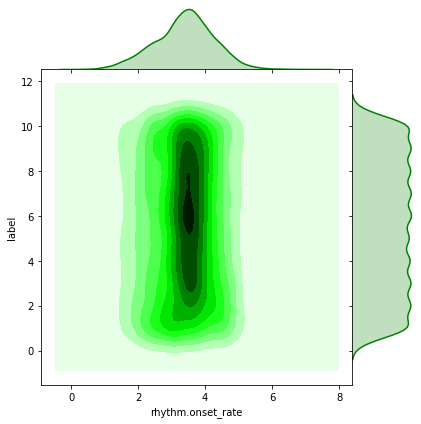

In [12]:
rhythm_features =  [f for f in df.columns.values if "rhythm" in f]
df[rhythm_features] = df[rhythm_features].fillna(df[rhythm_features].mean())

title_features = rhythm_features
for feature in title_features:
    sns.jointplot(x=feature, y="label", data=df[df.dataset=="train"],kind="kde", space=0, color="g")    

**Note**: yeah we can see something interesting from those above rhythms features.

## Tonal features

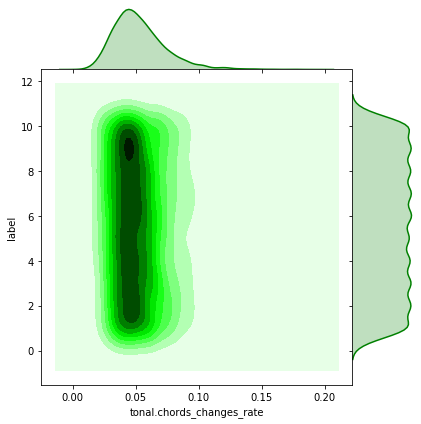

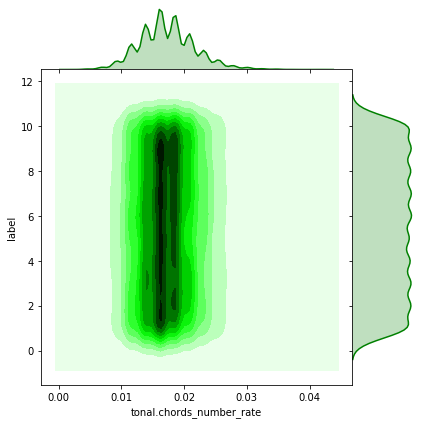

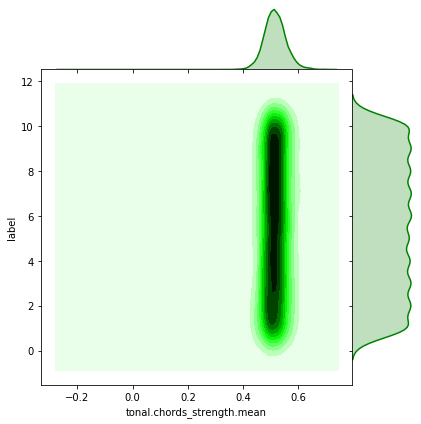

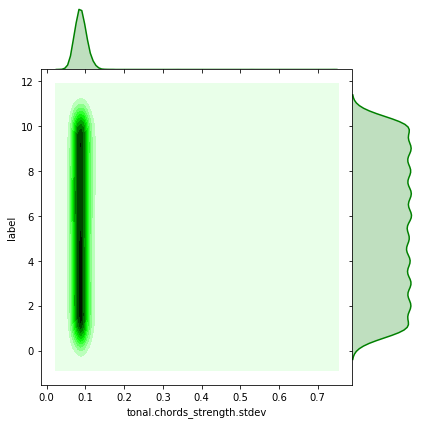

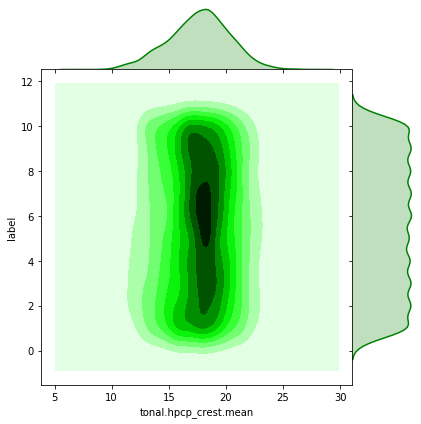

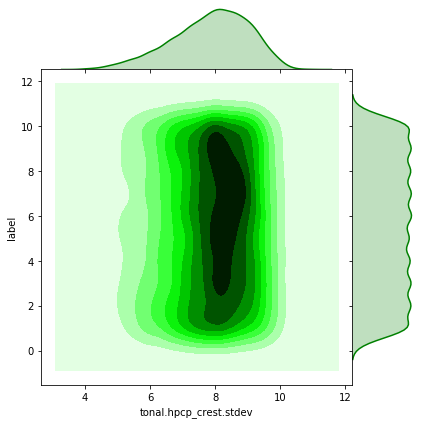

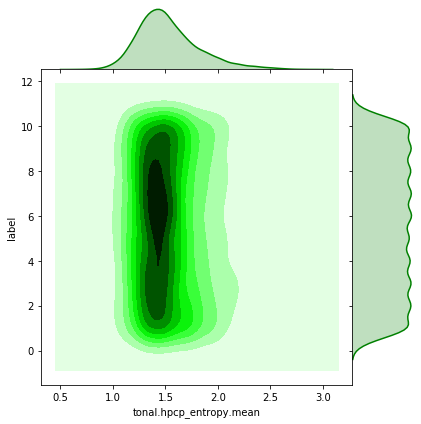

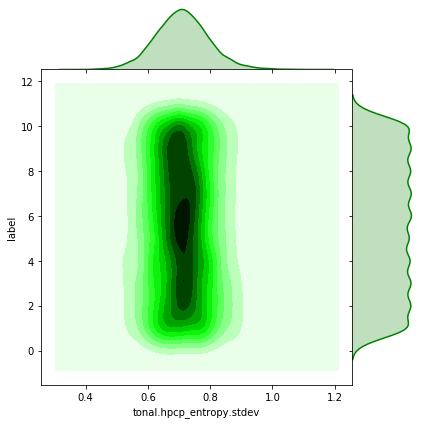

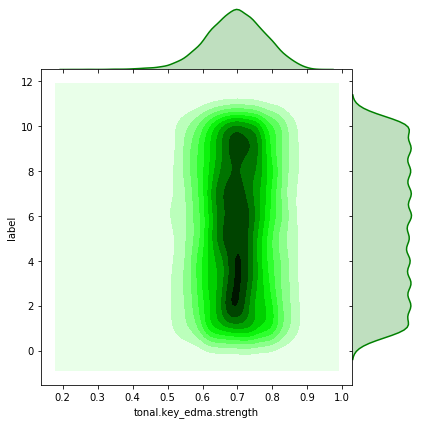

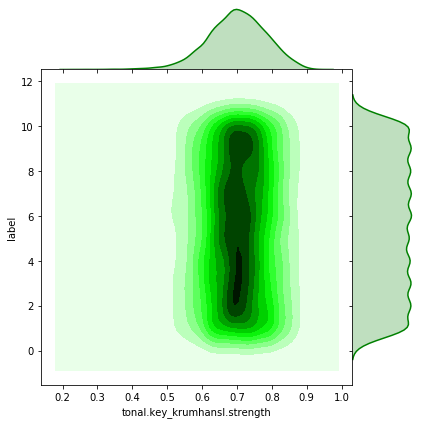

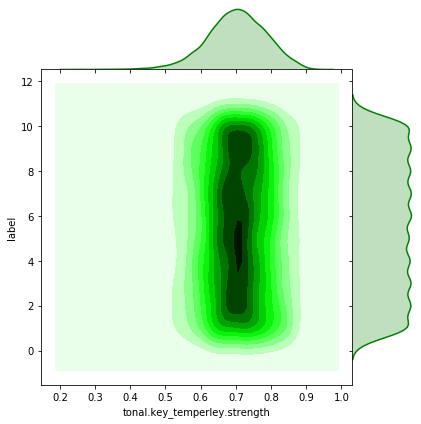

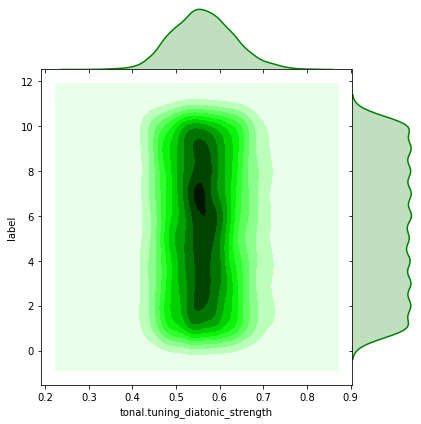

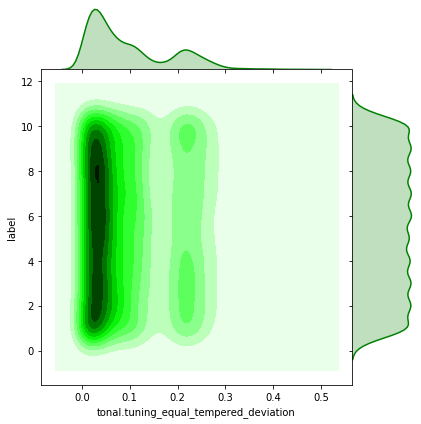

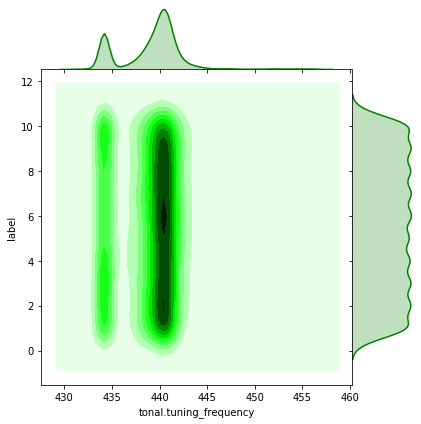

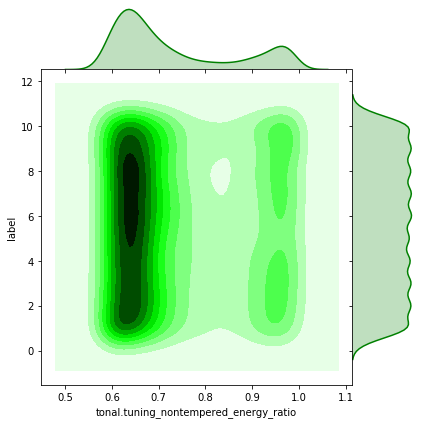

In [14]:
tonal_numeric_feature = ['tonal.chords_changes_rate',
 'tonal.chords_number_rate',
 'tonal.chords_strength.mean',
 'tonal.chords_strength.stdev',
 'tonal.hpcp_crest.mean',
 'tonal.hpcp_crest.stdev',
 'tonal.hpcp_entropy.mean',
 'tonal.hpcp_entropy.stdev',
 'tonal.key_edma.strength',
 'tonal.key_krumhansl.strength',
 'tonal.key_temperley.strength',
 'tonal.tuning_diatonic_strength',
 'tonal.tuning_equal_tempered_deviation',
 'tonal.tuning_frequency',
 'tonal.tuning_nontempered_energy_ratio',
]

df[tonal_numeric_feature] = df[tonal_numeric_feature].fillna(df[tonal_numeric_feature].mean())

title_features = tonal_numeric_feature
for feature in title_features:
    sns.jointplot(x=feature, y="label", data=df[df.dataset=="train"],kind="kde", space=0, color="g")    

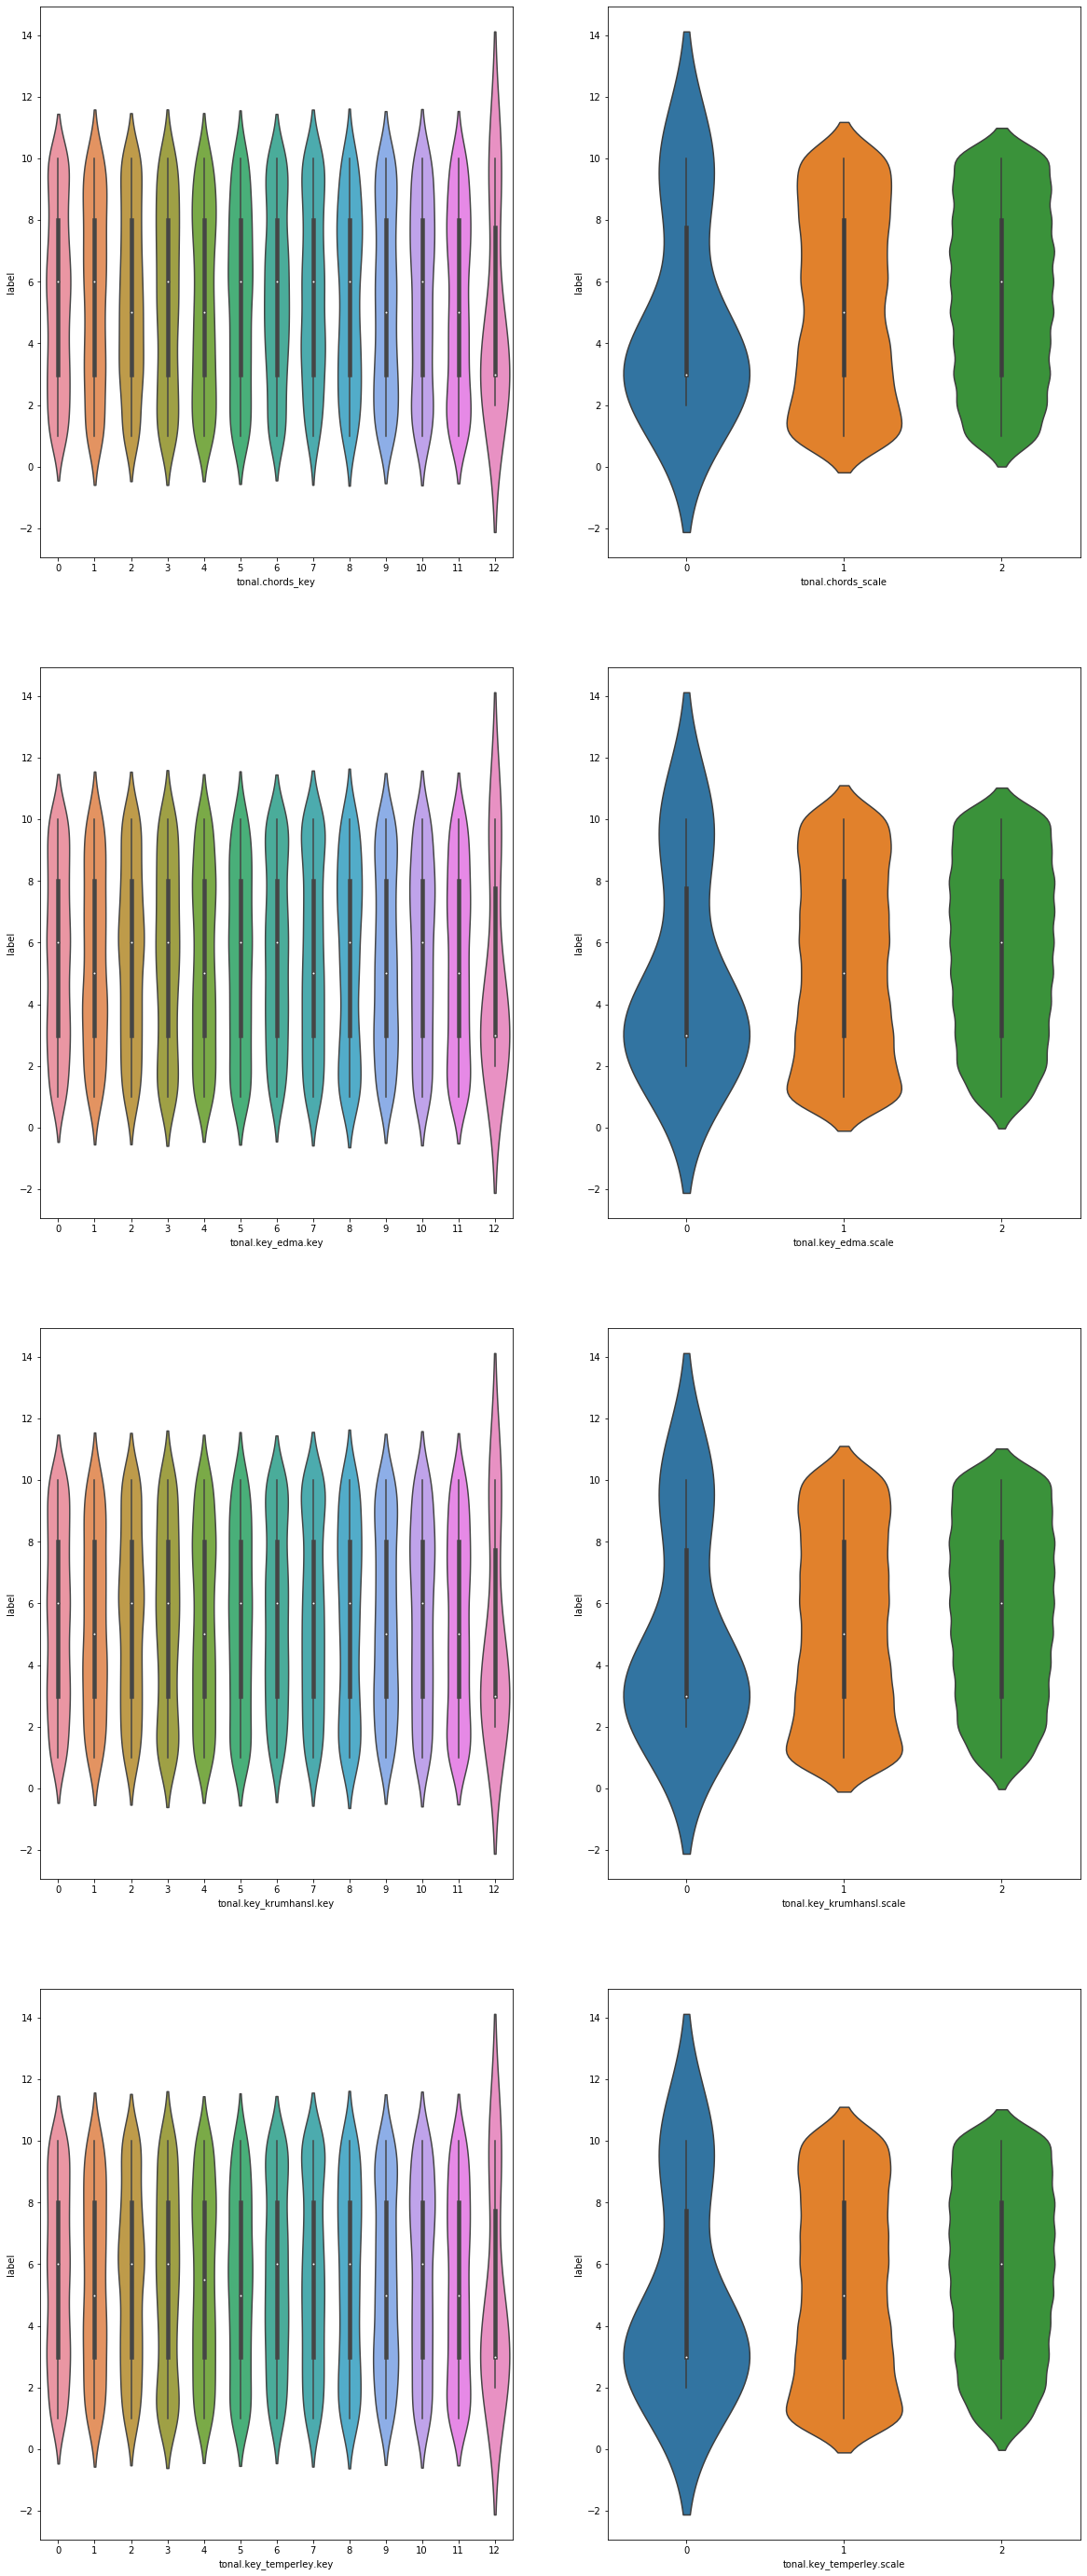

In [16]:
tonal_category_feature = [
'tonal.chords_key',
 'tonal.chords_scale',
 'tonal.key_edma.key',
 'tonal.key_edma.scale',
 'tonal.key_krumhansl.key',
 'tonal.key_krumhansl.scale',
 'tonal.key_temperley.key',
 'tonal.key_temperley.scale',
]

for f in tonal_category_feature:
    df[f] = df[f].fillna("No Key")
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes
    
title_features = tonal_category_feature
fig, axes = plt.subplots(4, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="box",ax=ax)    

**Note**: 
- Tonal categorical features looks not useful. For all Tonal categorical features,the label tend ditribute in the samw way.
- Tonal continous features looks more useful

# Some other features
Ideas: + Frequency of aritist id and composers id
       + Number of artist or composer of the song
       + range of ranks of song group by artist id and composer id
       + Len of the song to label
       + hour of release time or month of release time or year
       + Len of name of the song
       + Number of song released in the final month

In [18]:
from dateutil import relativedelta
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval as make_tuple
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))
df["freq_artist"] = df.groupby('artist_id')['artist_id'].transform('count')
df["freq_composer"] = df.groupby('composers_id')['composers_id'].transform('count')
df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["len_of_songname"] = df["title"].apply(lambda x: len(x.split(" ")))
df["isRemix"] = [ 1 if "Remix" in t else 0 for t in df["title"]]
df["isOST"] = [ 1 if "OST" in t else 0 for t in df["title"]]
df["isBeat"] = [ 1 if "Beat" in t else 0 for t in df["title"]]
df["isVersion"] = [ 1 if "Version" in t else 0 for t in df["title"]]
df["isCover"] = [ 1 if "Cover" in t else 0 for t in df["title"]]



df["Anh"] = [ 1 if "Anh" in t else 0 for t in df["title"]]
df["Em"] = [ 1 if "Em" in t else 0 for t in df["title"]]
df["Tinh"] = [ 1 if "Tình" in t else 0 for t in df["title"]]
df["Xuan"] = [ 1 if "Xuân" in t else 0 for t in df["title"]]
df["Khong"] = [ 1 if "Không" in t else 0 for t in df["title"]]


def find_num_song_release_in_final_month(df, day):
    month5th = day + relativedelta.relativedelta(months=5)
    month6th = day + relativedelta.relativedelta(months=6)  
    return len(df.datetime[(df.datetime >= month5th)&(df.datetime<=month6th)])



df["num_song_release_in_final_month"] = df.datetime.apply(lambda d:find_num_song_release_in_final_month(df ,d))


df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]

## Top 5 popular album

album
0       2185
2554      36
8         36
2477      29
774       28
Name: album, dtype: int64


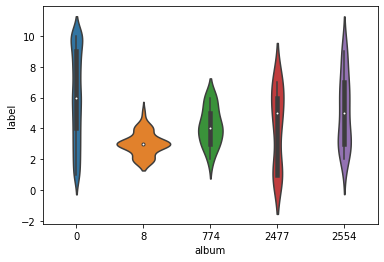

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


group_album = df_train.groupby("album")["album"].count().sort_values(ascending=False)
print(group_album[:5])
top5_popular_album = list(group_album.keys()[:5])

sns.violinplot(x="album", y="label", data=df_train[df_train.album.isin(top5_popular_album)], inner="box")

**Note**: The album 8, and 774 have very low variane in rank. Interesting! the songs belong to an album may have the same score!  

album_artist
Various Artists         231
Vũ Hoàng, Thạch Thảo    134
Hương Ngọc Vân          116
Trường Kha              105
Thích Trung Đạt         101
Name: album_artist, dtype: int64


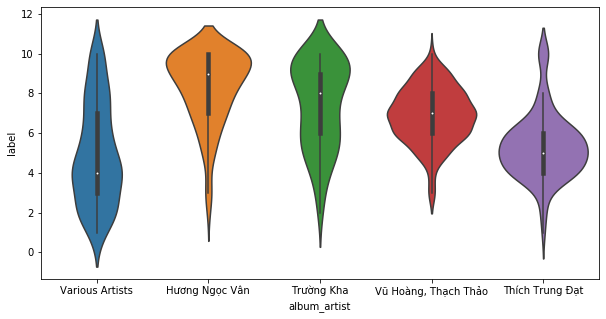

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,5))
group_album_artist = df_train.groupby("album_artist")["album_artist"].count().sort_values(ascending=False)
print(group_album_artist[:5])
top5_popular_albumn_artist = list(group_album_artist.keys()[:5])

sns.violinplot(x="album_artist", y="label", data=df_train[df_train.album_artist.isin(top5_popular_albumn_artist)], inner="box")


**Note**: Some top popular album_artist have low variance in ranks too.

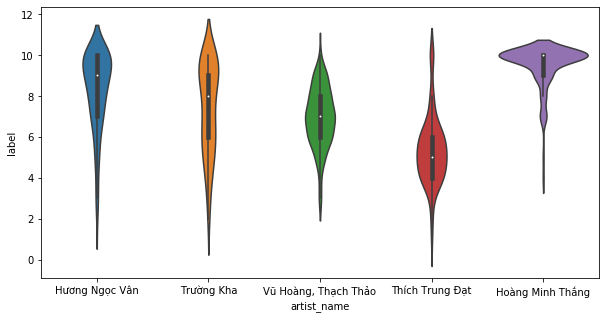

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,5))

group_artist = df_train.groupby("artist_name")["artist_name"].count().sort_values(ascending=False)
top5_popular_artist = list(group_artist.keys()[:5])


sns.violinplot(x="artist_name", y="label", data=df_train[df_train.artist_name.isin(top5_popular_artist)], inner="box")

**Note**: Some artist like "Hoang Minh Thang" has all songs with low ranks

# Some top words

Text(0.5, 1.0, 'Top word in top 3')

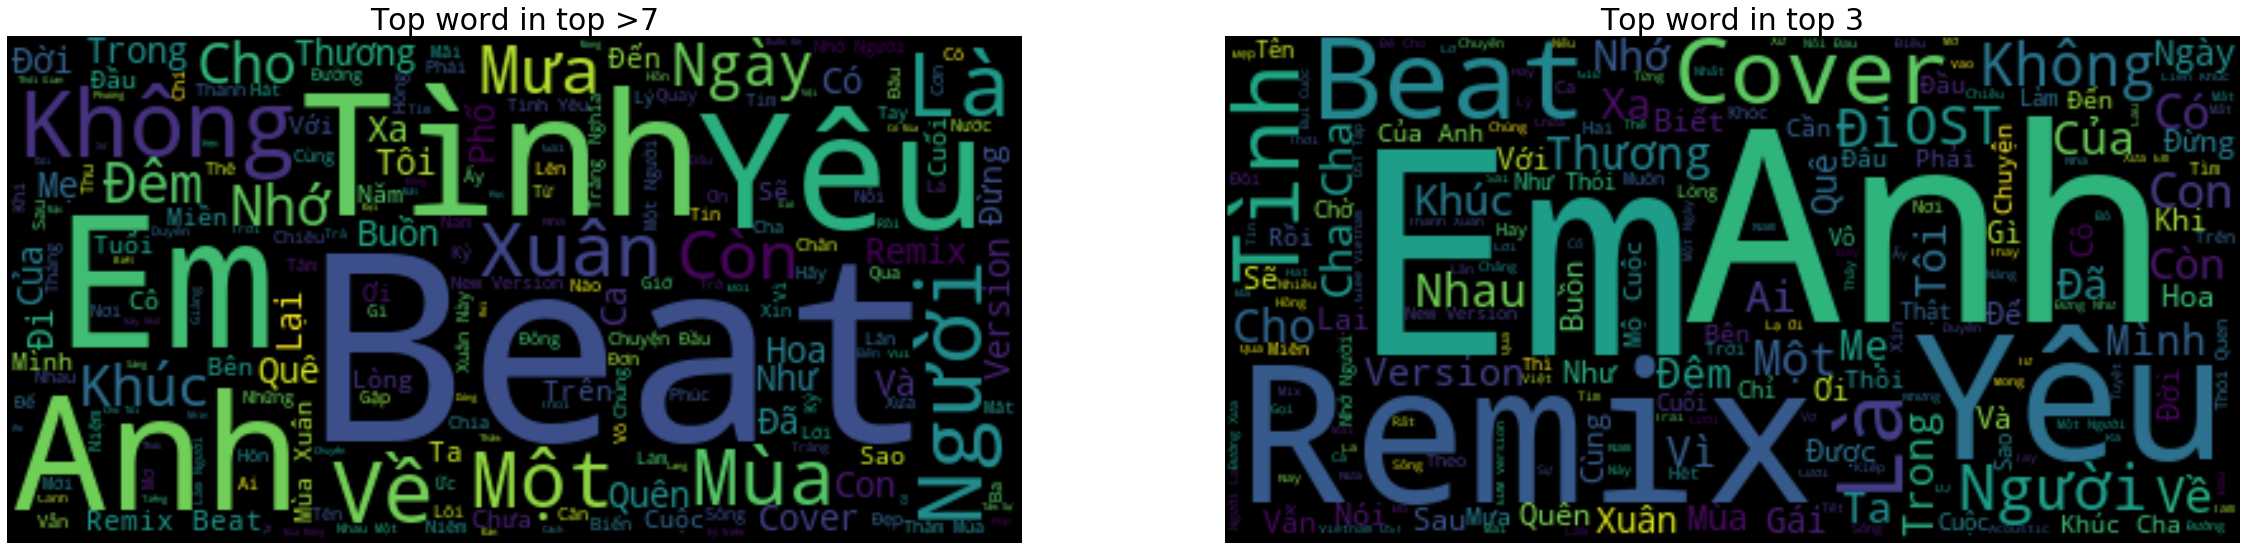

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



# Display the generated image:
fig, ax= plt.subplots(1,2,figsize=(40,40))

ax = ax.flat

corpus = df_train[df_train.label >7].title.values
text = ""
for c in corpus:
    text +=c
wordcloud = WordCloud().generate(text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Top word in top >7", fontsize=30)


corpus = df_train[df_train.label <=3].title.values
text = ""
for c in corpus:
    text +=c
wordcloud1 = WordCloud().generate(text)
ax[1].imshow(wordcloud1, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Top word in top 3",fontsize=30)


# Number of artists perform the song / ranks

[]

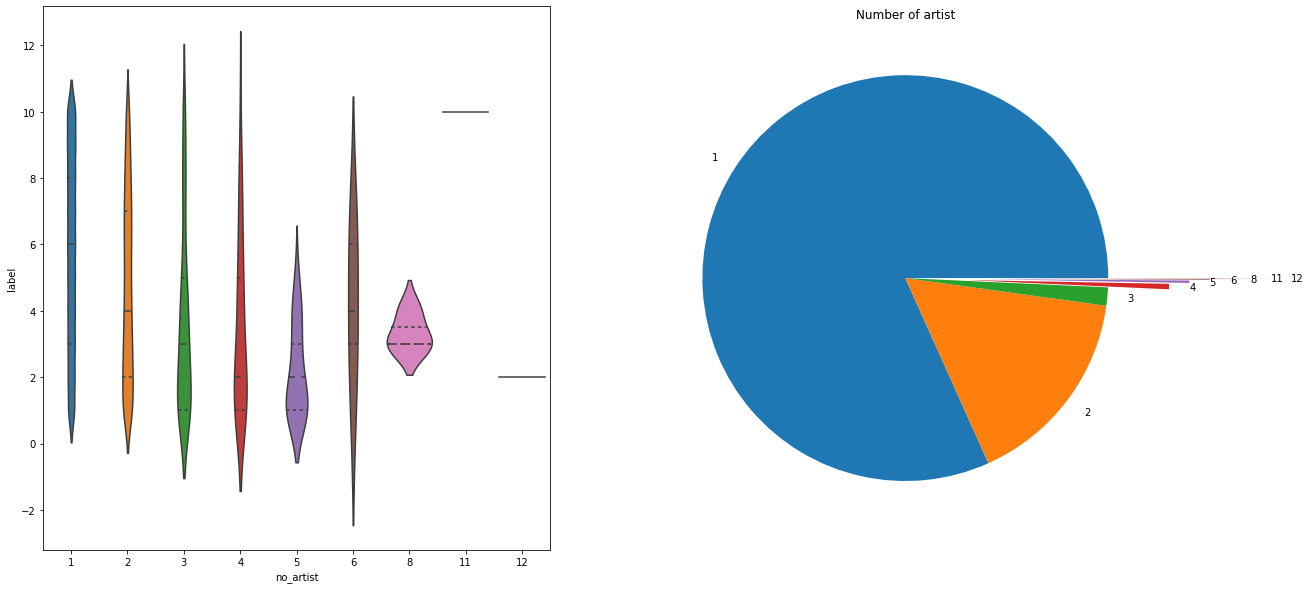

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

group_no_artist = df_train.groupby("album_artist")[["album_artist","artist_name","label"]]
group_no_artist.head(3000)
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.violinplot(x="no_artist", y="label", data=df_train, inner="quartile",ax=ax[0])
group_no_artist = df_train.groupby("no_artist")["no_artist"].count()
explode = np.zeros(len(list(group_no_artist.keys())))
explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
ax[1].pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))
ax[1].set_title("Number of artist")
plt.plot()

**Note**: Number of artists in the song == 5, then it is likely have high rank

# Number of composers per the song 

[]

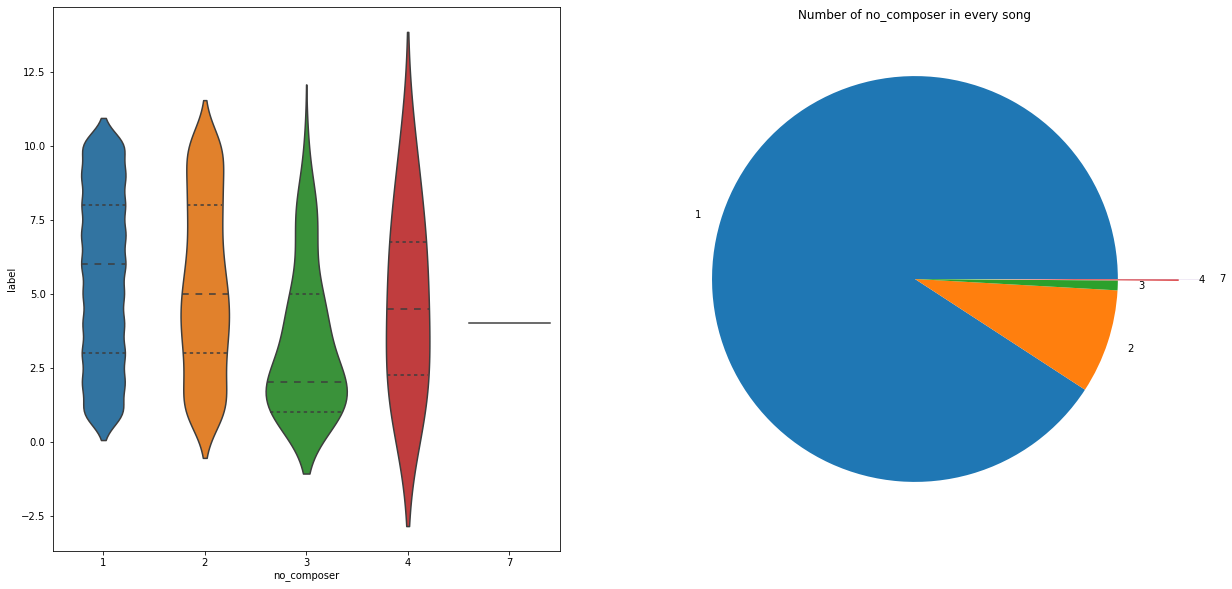

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.violinplot(x="no_composer", y="label", data=df_train, inner="quartile",ax=ax[0])
group_no_artist = df_train.groupby("no_composer")["no_composer"].count()
explode = np.zeros(len(list(group_no_artist.keys())))
explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
ax[1].pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))
ax[1].set_title("Number of no_composer in every song")
plt.plot()

# Frequency of artist and composers

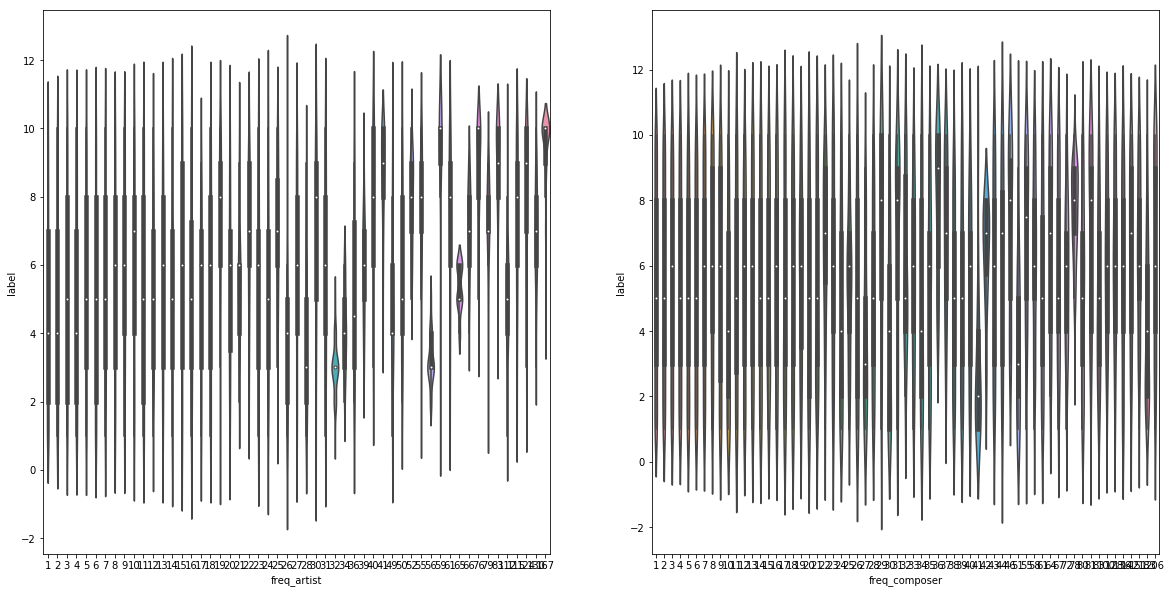

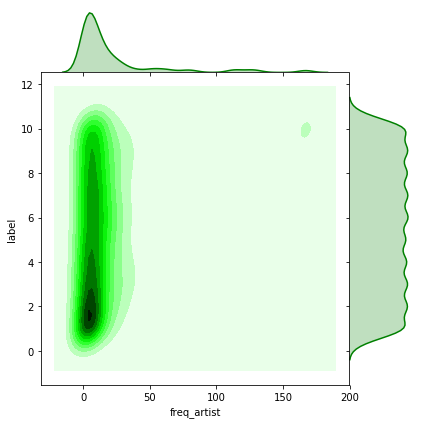

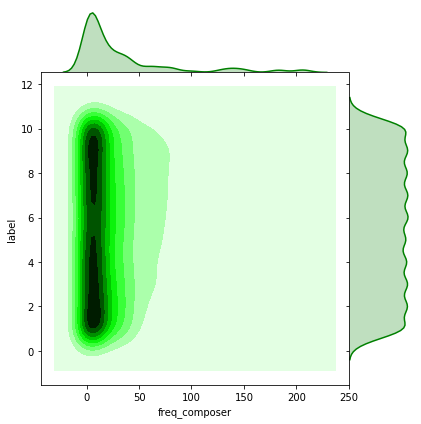

In [60]:
fig , ax = plt.subplots(1,2, figsize=(20,10))
ax = ax.flat
sns.jointplot(x="freq_artist", y= "label",data=df_train,kind="kde", space=0, color="g")
sns.violinplot(x="freq_artist",y="label", data=df_train, ax=ax[0])
sns.jointplot(x="freq_composer", y= "label",data=df_train,kind="kde", space=0, color="g")
sns.violinplot(x="freq_composer",y="label", data=df_train, ax=ax[1])

**Note**: Frequency of artist > 19, then the variance of ranks is less. i.e the model will have chance to predict songs in group Frequency of artist > 19 better

# Time

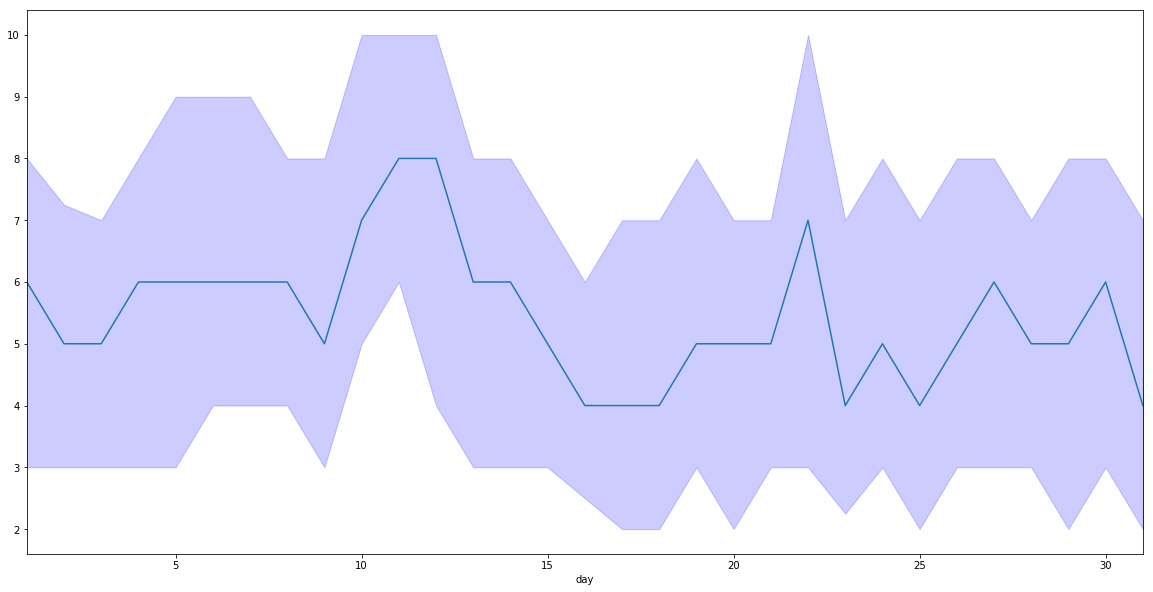

In [58]:
fig = plt.figure(figsize=(20,10))

column_groupby = [ "day"]
quantile25 = df_train.sort_values(by='datetime').groupby(column_groupby).label.quantile(0.25)
quantile75 = df_train.sort_values(by='datetime').groupby(column_groupby).label.quantile(0.75)
mean = df_train.sort_values(by='datetime').groupby(column_groupby).label.median().plot()

# print(mean)
if quantile25.index.nlevels> 1:
    index = quantile25.index.droplevel()
else:
    index = quantile25.index

plt.fill_between(range(1,len(index)+1), quantile25,quantile75,color='b', alpha=0.2)

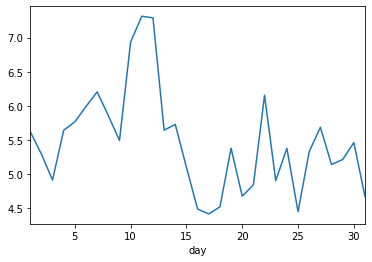

In [40]:
df_train.groupby(df_train.day).label.mean().plot()

**Note**: In day (10th-13rd) of the month, the song tend to have lower ranks. Why? May be 13rd Friday is unlucky.haha

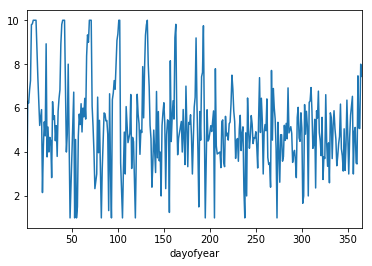

In [52]:
df_train.groupby(df_train.dayofyear).label.mean().plot()

**Note**: In the second haft of the year, the song tend to have higher rank, why? may be it is near some holiday of vietnam or enar chrismas, I amnotsure

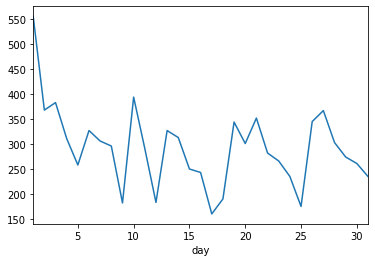

In [41]:
# The number of song releaseed for day of the  month
df_train.groupby(["day"]).count()['ID'].plot()

**Note**: The people tend to release the songs in some first day of the month